In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

import seaborn as sns
%matplotlib inline

In [2]:
photo = "Koala.jpg"

In [3]:
img = Image.open(photo)

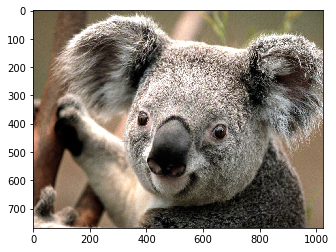

In [18]:
plt.imshow(img)

In [5]:
img.size

(1024, 768)

In [6]:
red_band =img.getdata(band=0)
img_mat = np.array(list(red_band), float) 
img_mat.size

786432

In [7]:
# get image shape
img_mat.shape = (img.size[1], img.size[0])
# conver to 1d-array to matrix
img_mat = np.matrix(img_mat)
img_mat

matrix([[101., 103., 110., ...,  96., 104.,  92.],
        [102., 108., 106., ...,  96., 100.,  89.],
        [106., 107., 106., ...,  96.,  99.,  95.],
        ...,
        [226., 228., 223., ..., 143., 142., 147.],
        [220., 214., 208., ..., 150., 145., 150.],
        [218., 209., 204., ..., 141., 140., 146.]])

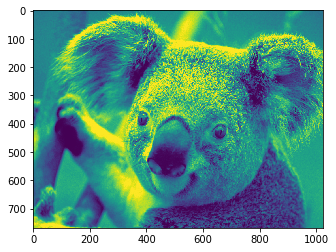

In [8]:
plt.imshow(img_mat)

In [9]:
img_mat_scaled= (img_mat-img_mat.mean())/img_mat.std()

In [10]:
U, s, V = np.linalg.svd(img_mat_scaled)

In [11]:
var_explained = np.round(s**2/np.sum(s**2), decimals=3)

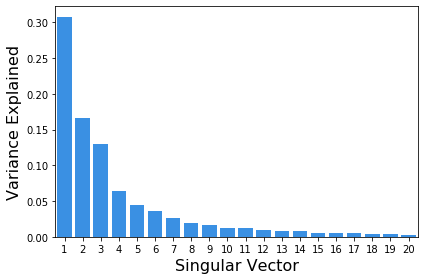

In [12]:
sns.barplot(x=list(range(1,21)),
            y=var_explained[0:20], color="dodgerblue")
plt.xlabel('Singular Vector', fontsize=16)
plt.ylabel('Variance Explained', fontsize=16)
plt.tight_layout()
plt.show()
#plt.savefig("Line_Plot_with_Pandas_Python.jpg")

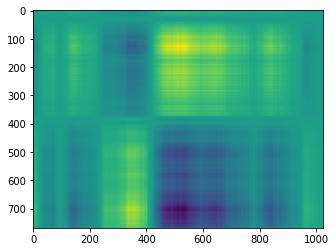

In [13]:
num_components = 1
reconst_img = np.matrix(U[:, :num_components]) * np.diag(s[:num_components]) *np.matrix(V[:num_components, :])
plt.imshow(reconst_img)

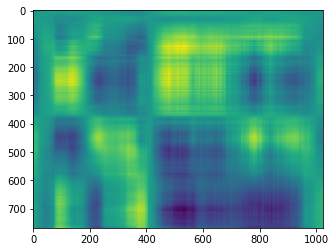

In [14]:
num_components = 2
reconst_img = np.matrix(U[:, :num_components]) * np.diag(s[:num_components]) *np.matrix(V[:num_components, :])
plt.imshow(reconst_img)

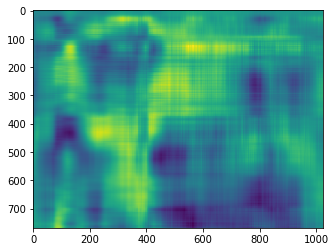

In [15]:
num_components = 4
reconst_img = np.matrix(U[:, :num_components]) * np.diag(s[:num_components]) *np.matrix(V[:num_components, :])
plt.imshow(reconst_img)

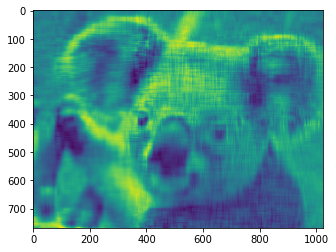

In [19]:
num_components = 16
reconst_img = np.matrix(U[:, :num_components]) * np.diag(s[:num_components]) *np.matrix(V[:num_components, :])
plt.imshow(reconst_img)

# Blue Band

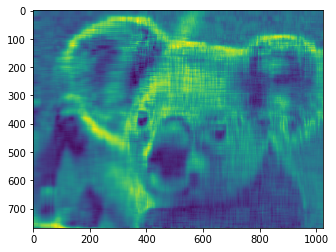

In [26]:
blue_band =img.getdata(band=2)
img_mat = np.array(list(blue_band), float) 
img_mat.size
# get image shape
img_mat.shape = (img.size[1], img.size[0])
# conver to 1d-array to matrix
img_mat = np.matrix(img_mat)
img_mat


# plt.imshow(img_mat)

img_mat_scaled= (img_mat-img_mat.mean())/img_mat.std()
U, s, V = np.linalg.svd(img_mat_scaled)
var_explained = np.round(s**2/np.sum(s**2), decimals=3)

num_components = 16
reconst_img_2 = np.matrix(U[:, :num_components]) * np.diag(s[:num_components]) *np.matrix(V[:num_components, :])
plt.imshow(reconst_img_2)

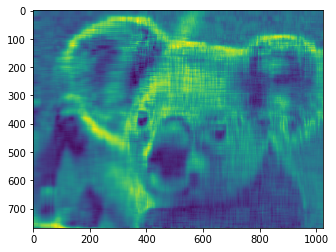

In [27]:
y_band =img.getdata(band=2)
img_mat = np.array(list(y_band), float) 
img_mat.size
# get image shape
img_mat.shape = (img.size[1], img.size[0])
# conver to 1d-array to matrix
img_mat = np.matrix(img_mat)
img_mat


# plt.imshow(img_mat)

img_mat_scaled= (img_mat-img_mat.mean())/img_mat.std()
U, s, V = np.linalg.svd(img_mat_scaled)
var_explained = np.round(s**2/np.sum(s**2), decimals=3)

num_components = 16
reconst_img_3 = np.matrix(U[:, :num_components]) * np.diag(s[:num_components]) *np.matrix(V[:num_components, :])
plt.imshow(reconst_img_3)

In [30]:
reconst_img_2.shape

(768, 1024)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


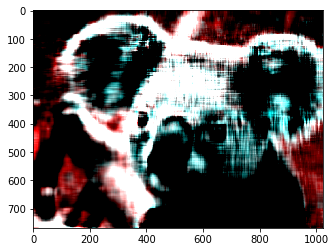

In [66]:
rgb = []
rgb.append(reconst_img)
rgb.append(reconst_img_2)
rgb.append(reconst_img_3)
rgb = np.array(rgb)
rgb_n = np.transpose(rgb, (1, 2, 0))
plt.imshow(rgb_n)